In [1]:
import os

In [2]:
from IPython.display import Audio 

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import tikzplotlib

In [5]:
from scipy.io import wavfile

In [6]:
rootDir = '../touchDesigner/data/generated/'

In [7]:
originalShoebox = '../touchDesigner/data/scenes/shoebox2/RIRs/wav/rir441.wav'

In [8]:
shoeBoxGen = os.path.join(rootDir,'ir_rir441_3.npy')
shoeBoxGenArr = np.load(shoeBoxGen)

In [9]:
sr,origArr = wavfile.read(originalShoebox)

In [10]:
origNorm = origArr/np.max(origArr)

In [11]:
shoeBoxNorm = shoeBoxGenArr/np.max(shoeBoxGenArr)

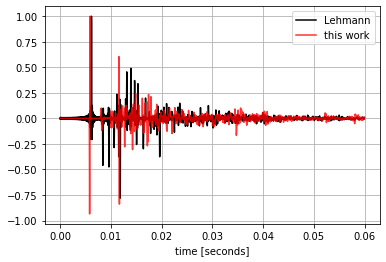

In [12]:
lim = 0.06 #seconds
nlim = int(lim*sr)

N = nlim#len(origArr)
n = np.arange(N)
t = n/sr 
plt.plot(t,origNorm[:nlim], 'k',label="Lehmann")

# N = len(shoeBoxNorm)
n = np.arange(N)
t = n/sr 
plt.plot(t,shoeBoxNorm[:nlim],'r',alpha=0.8, label = 'this work')

plt.legend(loc='upper right')

plt.xlabel('time [seconds]')
plt.grid()
fName = 'shoebox'
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.5f')
plt.show()

In [13]:
ha = plt.subplot(111)
plt.specgram(shoeBoxNorm[:4200],Fs=sr,NFFT=2**11,noverlap=2**11-10, vmin=-100,cmap='jet')
plt.colorbar()
plt.ylim([30,5000])
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [seconds]")
ha.set_yscale('log')
plt.show()

In [17]:
ha = plt.subplot(111)
plt.specgram(origNorm[:4200],Fs=sr,NFFT=2**11,noverlap=2**11-10, vmin=-100,cmap='jet')
plt.colorbar()
plt.ylim([30,5000])
ha.set_yscale('log')
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [seconds]")
plt.show()

In [15]:
Audio(data=origNorm,rate=44100)

In [16]:
Audio(data=shoeBoxNorm, rate=44100)

In [64]:
os.listdir(rootDir)

['ir_rir441_2.npy',
 'ir_scene3_RIR_LS1_MP1_0.npy',
 'ir_rir441_1.npy',
 'ir_scene1_RIR_Diffuse_LS1_MP1_0.npy',
 'ir_scene1_RIR_Absorbing_LS1_MP1_0.npy',
 'ir_scene2_RIR_1mPlate_rigid_LS1_MP1_0.npy',
 'ir_scene2_RIR_1mPlate_rigid_LS4_MP5_0.npy',
 'ir_scene1_RIR_Rigid_LS1_MP1_0.npy',
 'ir_scene3_RIR_LS1_MP1_2.npy',
 'ir_rir441_3.npy',
 'ir_rir441_0.npy']

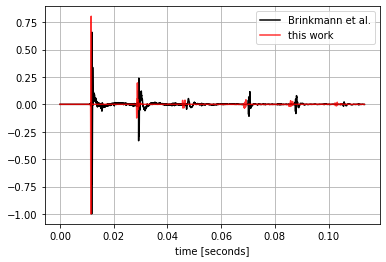

In [95]:
originalBrink = '../touchDesigner/data/scenes/03 multiple reflection (parallel finite plates)/RIRs/wav/scene3_RIR_LS1_MP1.wav'

sr,x = wavfile.read(originalBrink)

test2 = np.load(os.path.join(rootDir, "ir_scene3_RIR_LS1_MP1_2.npy"))

normTest2 = test2/np.max(abs(test2))
normBrink = x/np.max(abs(x))

N = 5000
t = np.arange(N)/sr
plt.plot(t,normBrink[:N],'k', label = "Brinkmann et al.")
plt.plot(t,normTest2[:N],'r', label="this work", alpha = 0.8)
plt.legend()
plt.grid()
plt.xlabel("time [seconds]")

fName = 'brink'
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.5f')

In [94]:
originalBrink = '../touchDesigner/data/scenes/01 single reflection (infinite plate)/RIRs/wav/scene1_RIR_Diffuse_LS1_MP1.wav'

sr,x = wavfile.read(originalBrink)

test2 = np.load(os.path.join(rootDir, "ir_scene1_RIR_Diffuse_LS1_MP1_0.npy"))

normTest2 = test2/np.max(abs(test2))
normBrink = x/np.max(abs(x))

N = 2000
t = np.arange(N)/sr
plt.plot(t,normBrink[:N],'k', label = "Brinkmann et al.")
plt.plot(t,normTest2[:N],'r', label="this work", alpha = 0.8)
plt.legend()
plt.grid()
plt.xlabel("time [seconds]")

fName = 'brinkDiff'
tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.5f')

In [120]:
Audio(originalBrink, rate=44100)

In [121]:
Audio(normTest2, rate=44100)